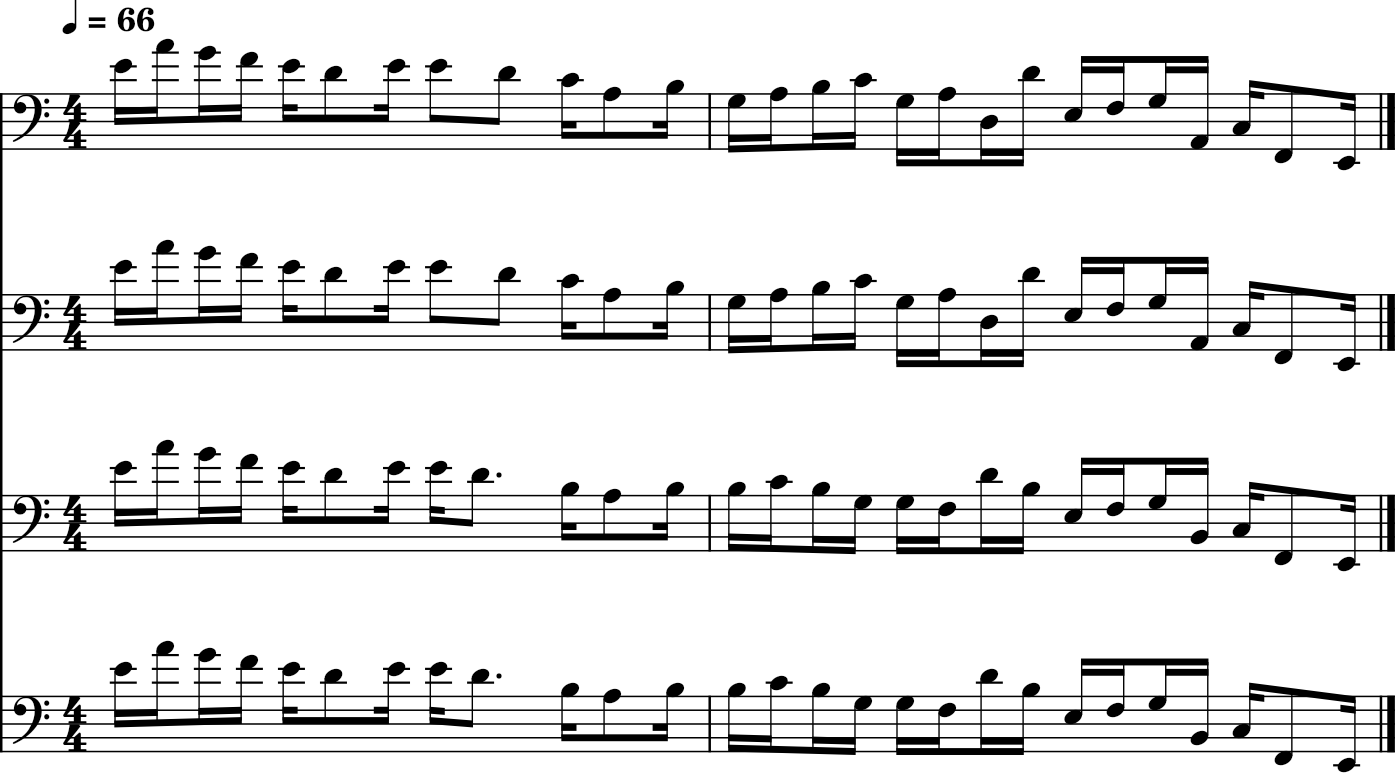

In [ ]:
from music21 import midi, environment

mf = midi.MidiFile()
# 打开 MIDI 文件
mf.open("files/example.midi")    
mf.read()
mf.close()
stream = midi.translate.midiFileToStream(mf)

us = environment.Environment()
# 定义 MuseScore 应用位置
path = r'util/MuseScore-Studio-4.4.4.243461245-x86_64.AppImage'
us['musescoreDirectPNGPath'] = path
# 可视化
stream.show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x7fcadb502d30>>

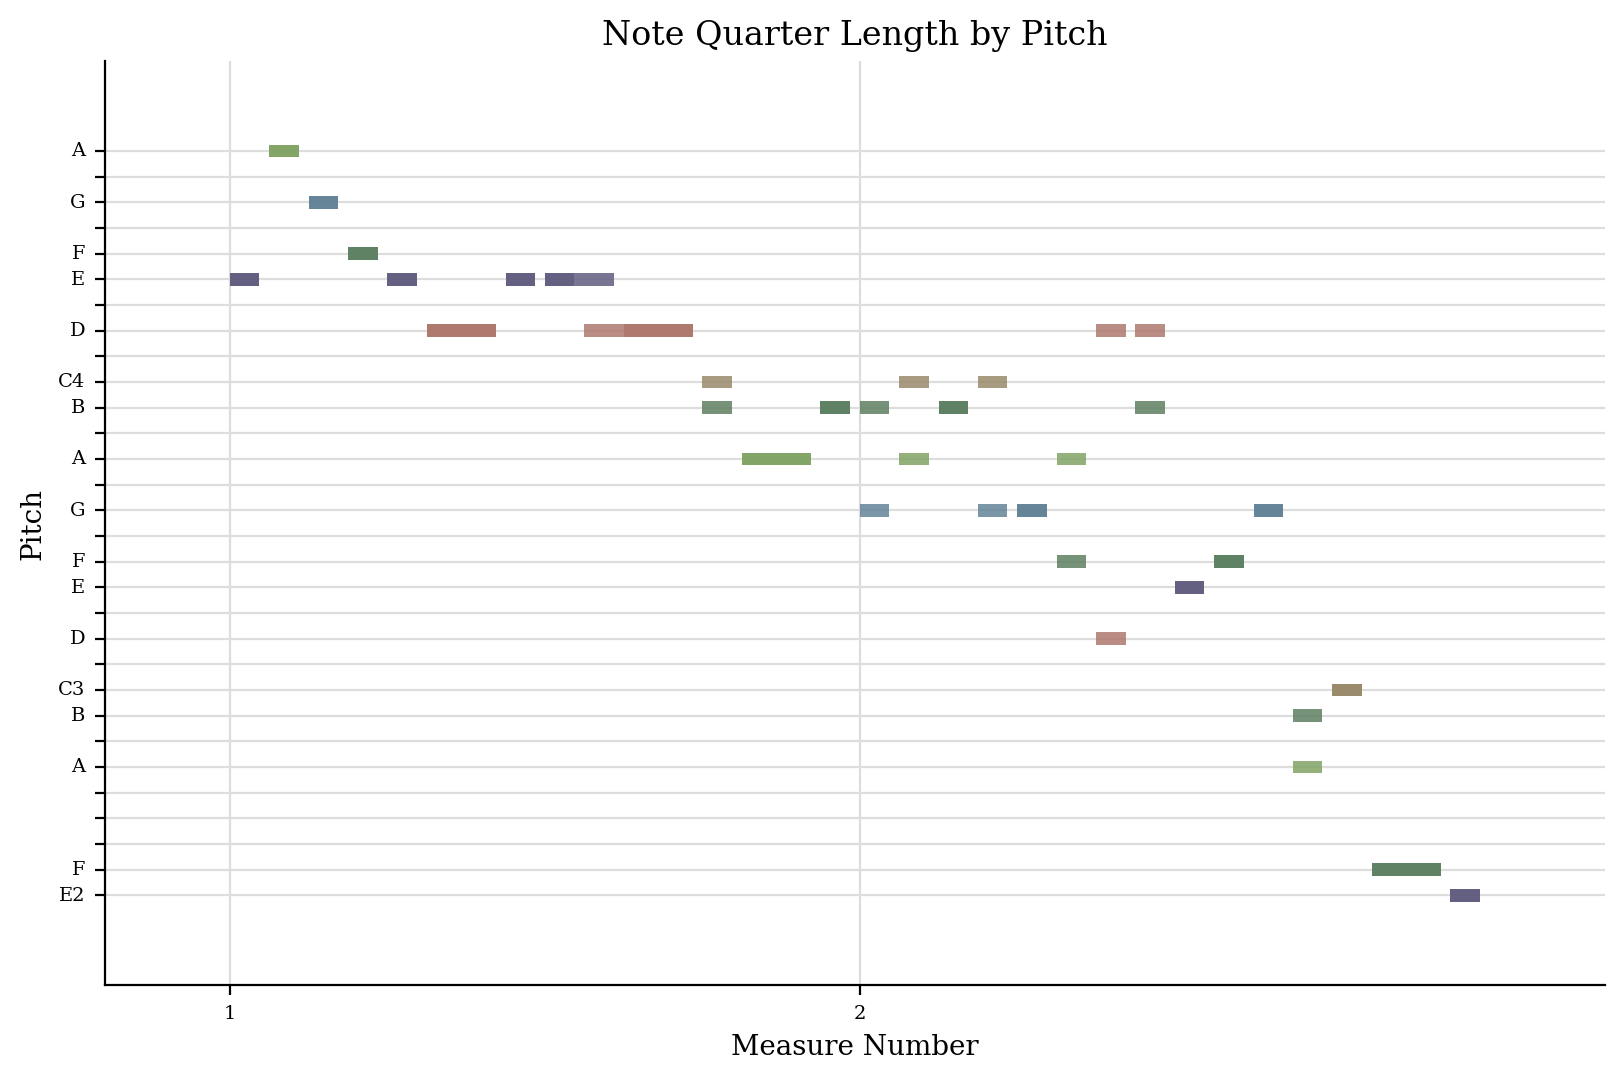

In [7]:
stream.plot()

In [8]:
for n in stream.recurse().notes:
    print(n.offset, n.pitches)

0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitch F4>,)
1.0 (<music21.pitch.Pitch E4>,)
1.25 (<music21.pitch.Pitch D4>,)
1.75 (<music21.pitch.Pitch E4>,)
2.0 (<music21.pitch.Pitch E4>,)
2.5 (<music21.pitch.Pitch D4>,)
3.0 (<music21.pitch.Pitch C4>,)
3.25 (<music21.pitch.Pitch A3>,)
3.75 (<music21.pitch.Pitch B3>,)
0.0 (<music21.pitch.Pitch G3>,)
0.25 (<music21.pitch.Pitch A3>,)
0.5 (<music21.pitch.Pitch B3>,)
0.75 (<music21.pitch.Pitch C4>,)
1.0 (<music21.pitch.Pitch G3>,)
1.25 (<music21.pitch.Pitch A3>,)
1.5 (<music21.pitch.Pitch D3>,)
1.75 (<music21.pitch.Pitch D4>,)
2.0 (<music21.pitch.Pitch E3>,)
2.25 (<music21.pitch.Pitch F3>,)
2.5 (<music21.pitch.Pitch G3>,)
2.75 (<music21.pitch.Pitch A2>,)
3.0 (<music21.pitch.Pitch C3>,)
3.25 (<music21.pitch.Pitch F2>,)
3.75 (<music21.pitch.Pitch E2>,)
0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitc

In [9]:
for n in stream.recurse().notes:
    print(n.offset,n.pitches[0].midi)

0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40


In [11]:
from torch.utils.data import DataLoader
from midi_util import MidiDataset

dataset = MidiDataset('files/Jsb16thSeparated.npz')
first_song=dataset[0]
print(first_song.shape)
loader = DataLoader(dataset, batch_size=64, 
                        shuffle=True, drop_last=True)

torch.Size([4, 2, 16, 84])


In [12]:
flat=first_song.reshape(-1,)
print(set(flat.tolist()))

{1.0, -1.0}


In [ ]:
import numpy as np
from music21 import note, stream, duration, tempo

parts = stream.Score()
parts.append(tempo.MetronomeMark(number=66))
# 将 84 维的独热编码向量转换为 0 到 83 之间的数字
max_pitches = np.argmax(first_song, axis=-1)
# 将结果整形为(32, 4)
midi_note_score = max_pitches.reshape([2 * 16, 4])
print(midi_note_score)

tensor([[74, 74, 74, 74],
        [75, 75, 75, 75],
        [77, 77, 77, 77],
        [77, 77, 77, 77],
        [75, 75, 75, 75],
        [74, 74, 74, 74],
        [72, 72, 72, 72],
        [72, 72, 72, 72],
        [70, 70, 70, 70],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [70, 70, 69, 69],
        [67, 67, 69, 69],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [69, 69, 69, 69],
        [65, 65, 65, 65],
        [58, 58, 60, 60],
        [62, 62, 62, 62],
        [62, 62, 62, 62],
        [63, 63, 63, 63],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [58, 58, 58, 58],
        [55, 55, 55, 55],
        [50, 50, 50, 50],
        [55, 55, 55, 55],
        [48, 48, 48, 48],
        [46, 46, 46, 46],
        [53, 53, 53, 53],
        [53, 53, 53, 53]])


In [ ]:
# 遍历 4 个音轨
for i in range(4):
    last_x = int(midi_note_score[:, i][0])
    s = stream.Part()
    dur = 0
    # 遍历每个音轨中的所有音符
    for idx, x in enumerate(midi_note_score[:, i]):
        x = int(x)
        if (x != last_x or idx % 4 == 0) and idx > 0:
            n = note.Note(last_x)
            n.duration = duration.Duration(dur)
            s.append(n)
            dur = 0
        last_x = x
        # 每个时间步增加 0.25 秒
        dur = dur + 0.25
    n = note.Note(last_x)
    n.duration = duration.Duration(dur)
    # 将音符添加到音乐流中
    s.append(n)
    parts.append(s)  
parts.write("midi","files/first_song.midi")

'files/first_song.midi'

In [15]:
second_song=dataset[1]
parts = stream.Score()
parts.append(tempo.MetronomeMark(number=66))
max_pitches = np.argmax(second_song, axis=-1)
midi_note_score = max_pitches.reshape([2 * 16, 4])
for i in range(4):
    last_x = int(midi_note_score[:, i][0])
    s = stream.Part()
    dur = 0
    for idx, x in enumerate(midi_note_score[:, i]):
        x = int(x)
        if (x != last_x or idx % 4 == 0) and idx > 0:
            n = note.Note(last_x)
            n.duration = duration.Duration(dur)
            s.append(n)
            dur = 0
        last_x = x
        dur = dur + 0.25
    n = note.Note(last_x)
    n.duration = duration.Duration(dur)
    s.append(n)
    parts.append(s)  
parts.write("midi","files/second_song.midi")

'files/second_song.midi'

In [17]:
import torch
from MuseGAN_util import (
    init_weights, MuseGenerator, MuseCritic)

device = "cuda" if torch.cuda.is_available() else "cpu"
generator = MuseGenerator(z_dimension=32, hid_channels=1024, 
              hid_features=1024, out_channels=1).to(device)
critic = MuseCritic(hid_channels=128,
                    hid_features=1024,
                    out_features=1).to(device)
generator = generator.apply(init_weights)
critic = critic.apply(init_weights)

In [18]:
lr = 0.001
g_optimizer = torch.optim.Adam(generator.parameters(),
                               lr=lr, betas=(0.5, 0.9))
c_optimizer = torch.optim.Adam(critic.parameters(),
                               lr=lr, betas=(0.5, 0.9))

In [ ]:
from MuseGAN_util import loss_fn, GradientPenalty

# 定义超参数
batch_size=64
repeat=5
display_step=10
epochs=500
# 定义 alpha 用于创建插值音乐
alpha=torch.rand((batch_size,1,1,1,1)).requires_grad_().to(device)
# 实例化 gp 计算梯度惩罚
gp=GradientPenalty()
# 定义 noise() 函数获取四个随机噪声向量
def noise():
    chords = torch.randn(batch_size, 32).to(device)
    style = torch.randn(batch_size, 32).to(device)
    melody = torch.randn(batch_size, 4, 32).to(device)
    groove = torch.randn(batch_size, 4, 32).to(device)
    return chords,style,melody,groove

In [20]:
def train_epoch():
    e_gloss = 0
    e_closs = 0
    # 遍历所有批数据
    for real in loader:
        real = real.to(device)
        # 在每次迭代中训练评论家五次
        for _ in range(repeat):
            chords,style,melody,groove=noise()
            c_optimizer.zero_grad()
            with torch.no_grad():
                fake = generator(chords, style, melody,groove).detach()
            realfake = alpha * real + (1 - alpha) * fake
            fake_pred = critic(fake)
            real_pred = critic(real)
            realfake_pred = critic(realfake)
            fake_loss =  loss_fn(fake_pred,-torch.ones_like(fake_pred))
            real_loss = loss_fn(real_pred,torch.ones_like(real_pred))
            penalty = gp(realfake, realfake_pred)
            # 总损失有三个组成部分：
            # 评估真实音乐的损失、评估伪造音乐的损失以及梯度惩罚损失
            closs = fake_loss + real_loss + 10 * penalty
            closs.backward(retain_graph=True)
            c_optimizer.step()
            e_closs += closs.item() / (repeat*len(loader))
        # 训练生成器
        g_optimizer.zero_grad()
        chords,style,melody,groove=noise()
        fake = generator(chords, style, melody, groove)
        fake_pred = critic(fake)
        gloss = loss_fn(fake_pred, torch.ones_like(fake_pred))
        gloss.backward()
        g_optimizer.step()
        e_gloss += gloss.item() / len(loader)
    return e_gloss, e_closs

In [21]:
for epoch in range(1,epochs+1):
    e_gloss, e_closs = train_epoch()
    if epoch % display_step == 0:
        print(f"Epoch {epoch}, G loss {e_gloss} C loss {e_closs}")

/home/brainiac/.local/lib/python3.8/site-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 10, G loss 1087.5081888834634 C loss -100.21704250971476
Epoch 20, G loss -762.8623046875 C loss -21.88773511250814
Epoch 30, G loss -1101.1666514078775 C loss -18.05350170135498
Epoch 40, G loss -835.474365234375 C loss -15.632653427124025
Epoch 50, G loss -865.5097452799479 C loss -10.036751015981038
Epoch 60, G loss -932.8279622395833 C loss -6.991762638092041
Epoch 70, G loss -357.2640686035156 C loss -8.297214190165201
Epoch 80, G loss -45.169778664906815 C loss -16.117402203877766
Epoch 90, G loss -8.711535135904949 C loss -20.359966150919593
Epoch 100, G loss -37.502397537231445 C loss -20.67423197428386
Epoch 110, G loss -55.05797576904297 C loss -20.8426020304362
Epoch 120, G loss -62.61614004770915 C loss -21.175688298543296
Epoch 130, G loss -40.374257405598954 C loss -19.420200856526694
Epoch 140, G loss -23.386694590250652 C loss -17.63894958496094
Epoch 150, G loss -34.355051040649414 C loss -16.39317302703857
Epoch 160, G loss -37.0657958984375 C loss -14.788166999

In [22]:
torch.save(generator.state_dict(),'files/MuseGAN_G.pth')

In [24]:
generator.load_state_dict(torch.load('files/MuseGAN_G.pth', weights_only=False))

<All keys matched successfully>

In [25]:
num_pieces = 5
chords = torch.rand(num_pieces, 32).to(device)
style = torch.rand(num_pieces, 32).to(device)
melody = torch.rand(num_pieces, 4, 32).to(device)
groove = torch.rand(num_pieces, 4, 32).to(device)

In [26]:
preds = generator(chords, style, melody, groove).detach()

In [28]:
from midi_util import convert_to_midi

music_data = convert_to_midi(preds.cpu().numpy())
music_data.write('midi', 'files/MuseGAN_song.midi')

'files/MuseGAN_song.midi'

In [29]:
num_pieces = 3
chords = torch.rand(num_pieces, 32).to(device)
style = torch.rand(num_pieces, 32).to(device)
melody = torch.rand(num_pieces, 4, 32).to(device)
groove = torch.rand(num_pieces, 4, 32).to(device)
preds = generator(chords, style, melody, groove).detach()
music_data = convert_to_midi(preds.cpu().numpy())
music_data.write('midi', 'files/generated_song.midi')

'files/generated_song.midi'